# K-means算法代码示例


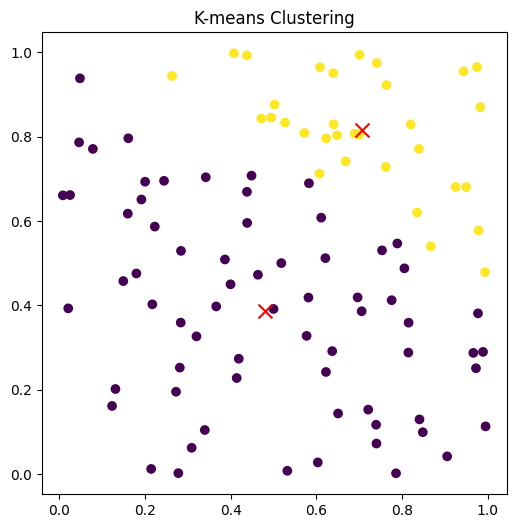

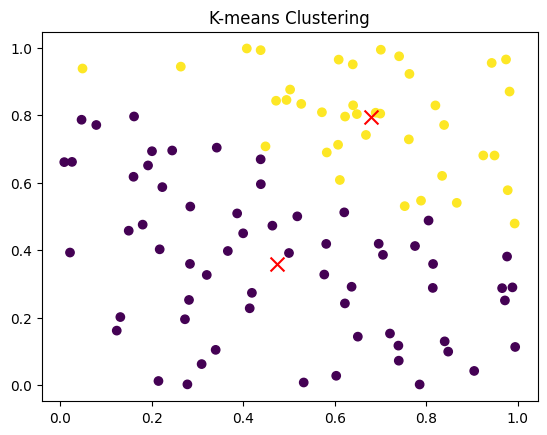

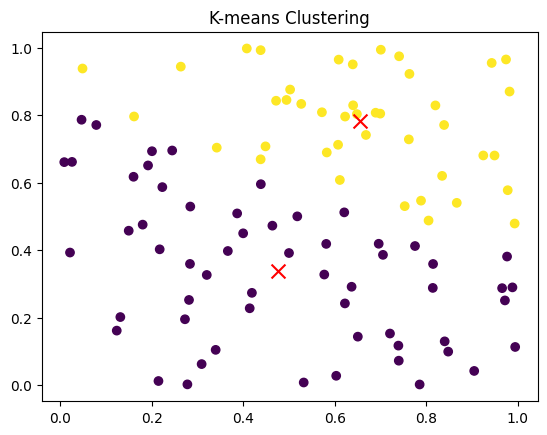

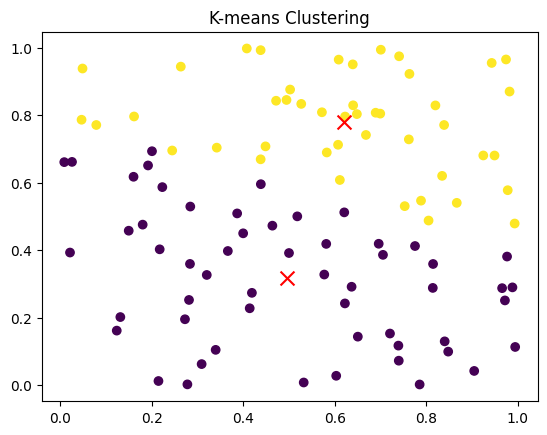

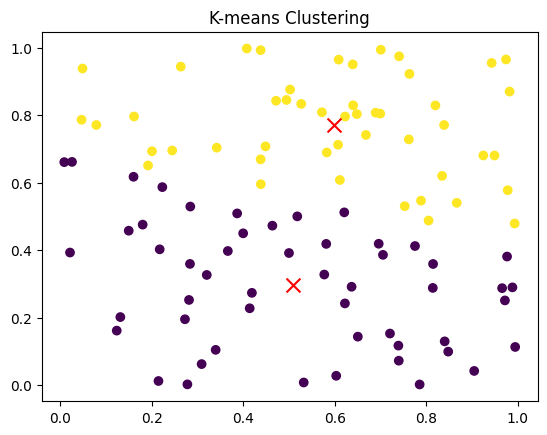

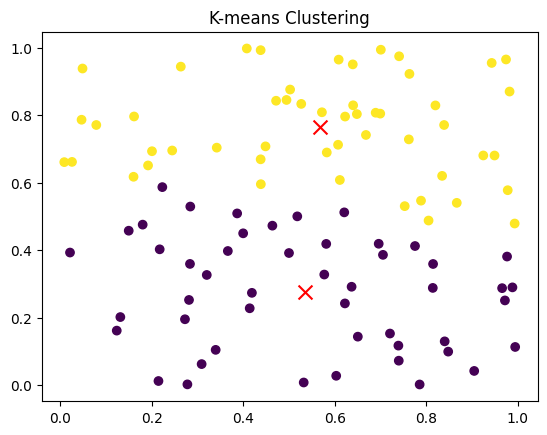

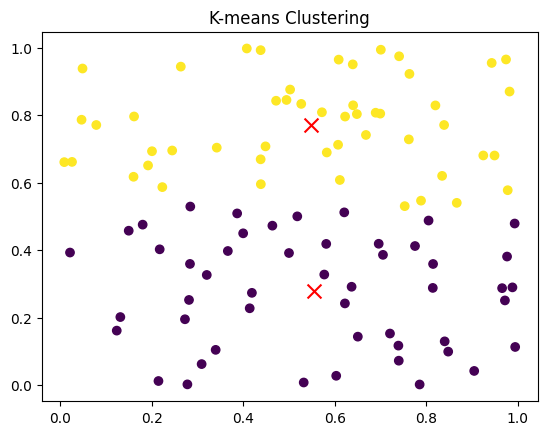

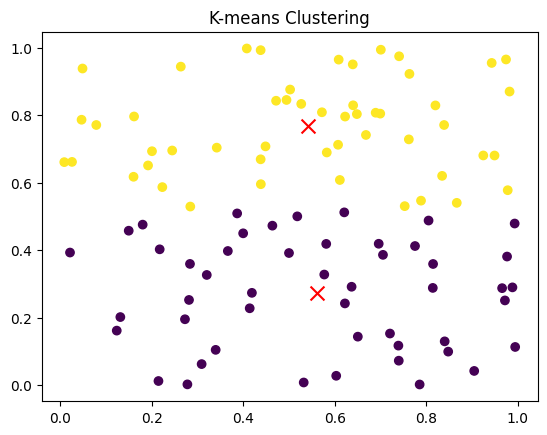

<Figure size 640x480 with 0 Axes>

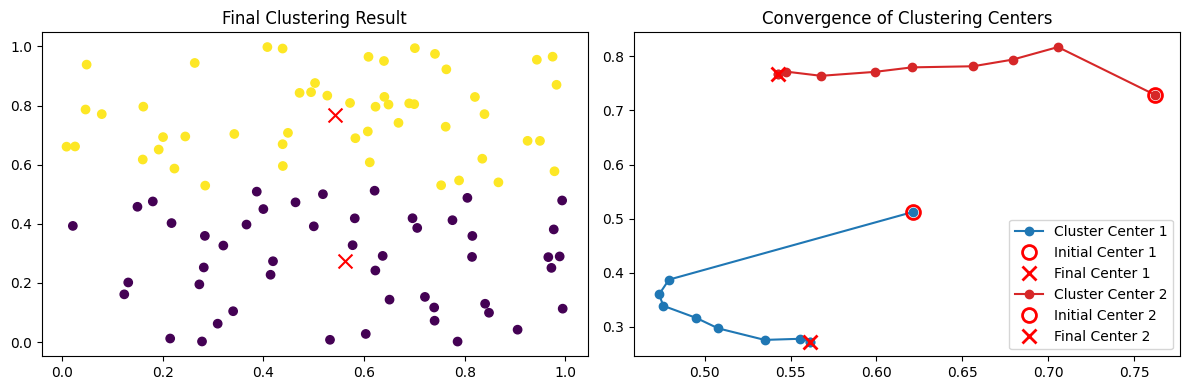

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time

# 生成示例数据
X = np.random.rand(100, 2)

# 初始化聚类中心
centroids = X[np.random.choice(X.shape[0], 2, replace=False)]

# 计算距离
def euclidean_distance(x, y):
    return np.linalg.norm(x - y)

# 分配数据点到最近的聚类中心
def assign_clusters(data, centroids):
    clusters = np.zeros(data.shape[0])
    for i, x in enumerate(data):
        distances = [euclidean_distance(x, c) for c in centroids]
        clusters[i] = np.argmin(distances)
    return clusters

# 更新聚类中心
def update_centroids(data, clusters, k):
    new_centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        new_centroids[i] = np.mean(data[clusters == i], axis=0)
    return new_centroids

# K-means算法

def kmeans(data, k, max_iter=100):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    centroid_history = [centroids.copy()]
    for _ in range(max_iter):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        centroid_history.append(new_centroids.copy())
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
        # 在同一张图上动态绘制聚类中心的变化
        plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
        plt.title('K-means Clustering')
        plt.pause(0.5)
        plt.clf()
    return centroids, clusters, centroid_history

# 设置k值
k = 2

# 绘制结果
plt.figure(figsize=(6, 6))
centroids, clusters, centroid_history = kmeans(X, k)

# 绘制聚类结果
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.title('Final Clustering Result')

# 绘制聚类中心的收敛过程
plt.subplot(122)
centroid_history = np.array(centroid_history)
for i in range(k):
    plt.plot(centroid_history[:, i, 0], centroid_history[:, i, 1], '-o', label=f'Cluster Center {i+1}')
    plt.plot([centroid_history[0, i, 0]], [centroid_history[0, i, 1]], 'o', markersize=10, markerfacecolor='none', markeredgecolor='r', markeredgewidth=2, label=f'Initial Center {i+1}')
    plt.plot([centroid_history[-1, i, 0]], [centroid_history[-1, i, 1]], 'x', markersize=10, markeredgecolor='r', markeredgewidth=2, label=f'Final Center {i+1}')

plt.title('Convergence of Clustering Centers')
plt.legend()
plt.tight_layout()
plt.show()